## Exploratory Data Analysis

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
import os
import sys

# Set os.getwd + 1_gaussian_progress_regression to path
current_path = os.getcwd() + '/1_gaussian_progress_regression'
sys.path.append(current_path)

In [3]:


train_x_path, train_y_path = 'train_x.csv','train_y.csv'

# Read a csv with numpy
X, Y = np.genfromtxt(train_x_path, delimiter=',', skip_header=1), np.genfromtxt(train_y_path, delimiter=',', skip_header=1)

# check the shape of X and Y
print(X.shape, Y.shape)

# The dataset provides data on the air quality with X[:, 0] being the longitude,  
# X[:, 1] being the latitude and X[:, 2] being the district of the town (0 or 1).
# The response variable Y is the amount of PM_2.5 in the air.


(15189, 3) (15189,)


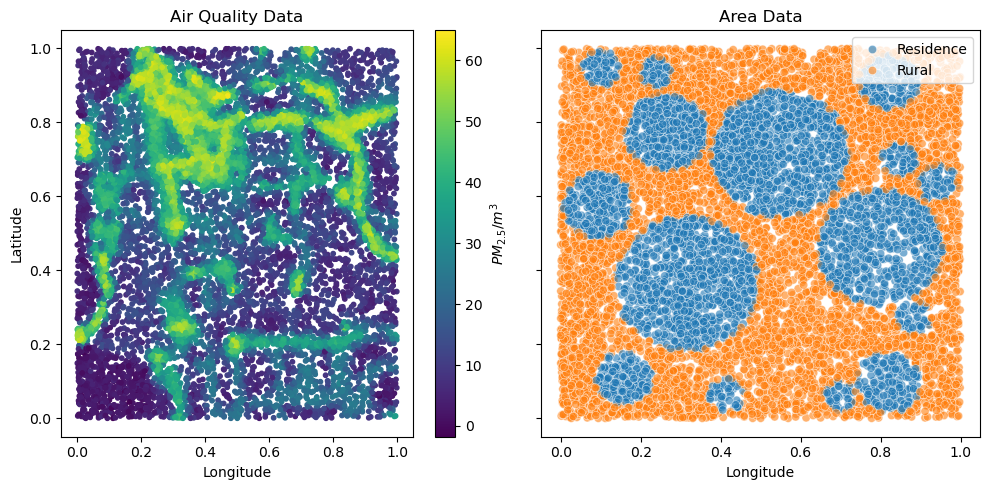

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
# Initialize subplots with one row and two columns

# Plot the data in the first subplot
scatter1 = ax[0].scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', s=10)
# Provide a colorbar for the first subplot and set the label
fig.colorbar(scatter1, ax=ax[0], label='$PM_{2.5} / m^3$')
# Provide a title and labels for the first subplot
ax[0].set_title('Air Quality Data')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

# Plot the background of the cloud in the second subplot
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=np.where(X[:, 2] == 0, "Rural", "Residence"), ax=ax[1], alpha=0.6)
# scatter2 = ax[1].scatter(X[:, 0], X[:, 1], c=X[:, 2], 
#                          cmap='viridis', s=10, alpha=0.1)
# Provide a colorbar for the second subplot
# fig.colorbar(scatter2, ax=ax[1], ticks=[0, 1], label='Area').ax.set_yticklabels(['Residence', 'Country'])
# Provide a title and labels for the second subplot
ax[1].set_title('Area Data')
ax[1].set_xlabel('Longitude')
# ax[1].set_ylabel('Latitude')

# Show the plot
plt.tight_layout()
plt.show()




In [23]:
def kmeans_undersample_with_responses(data: np.ndarray, area: np.array, responses: np.ndarray, n_clusters: int = 2000):
    """
    Perform K-Means clustering to undersample 2D data, returning representative points with their responses.
    
    Parameters:
        data (np.ndarray): The input dataset as a 2D NumPy array of shape (num_samples, 2).
        responses (np.ndarray): The response values associated with each sample, as a 1D array.
        n_clusters (int): The number of clusters to form. Default is 2000.
    
    Returns:
        np.ndarray: A reduced dataset containing the representative samples from each cluster.
        np.ndarray: The corresponding response values for the selected representative samples.
    """
    
    # Initialize the K-Means model
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    
    # Fit the model to the data
    kmeans.fit(data)
    
    # Get the centroids of the clusters
    centroids = kmeans.cluster_centers_
    
    # Vectorized distance calculation between centroids and all data points
    # Resulting distances will be a matrix of shape (n_clusters, num_samples)
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

    # Find the index of the closest point for each centroid
    representative_indices = np.argmin(distances, axis=0)
    
    # Use the indices to get the representative samples and their responses
    representative_data = data[representative_indices]
    representative_areas = area[representative_indices]
    representative_responses = responses[representative_indices]
    
    return representative_data, representative_areas, representative_responses

c:\Users\paesc\anaconda3\envs\pai_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


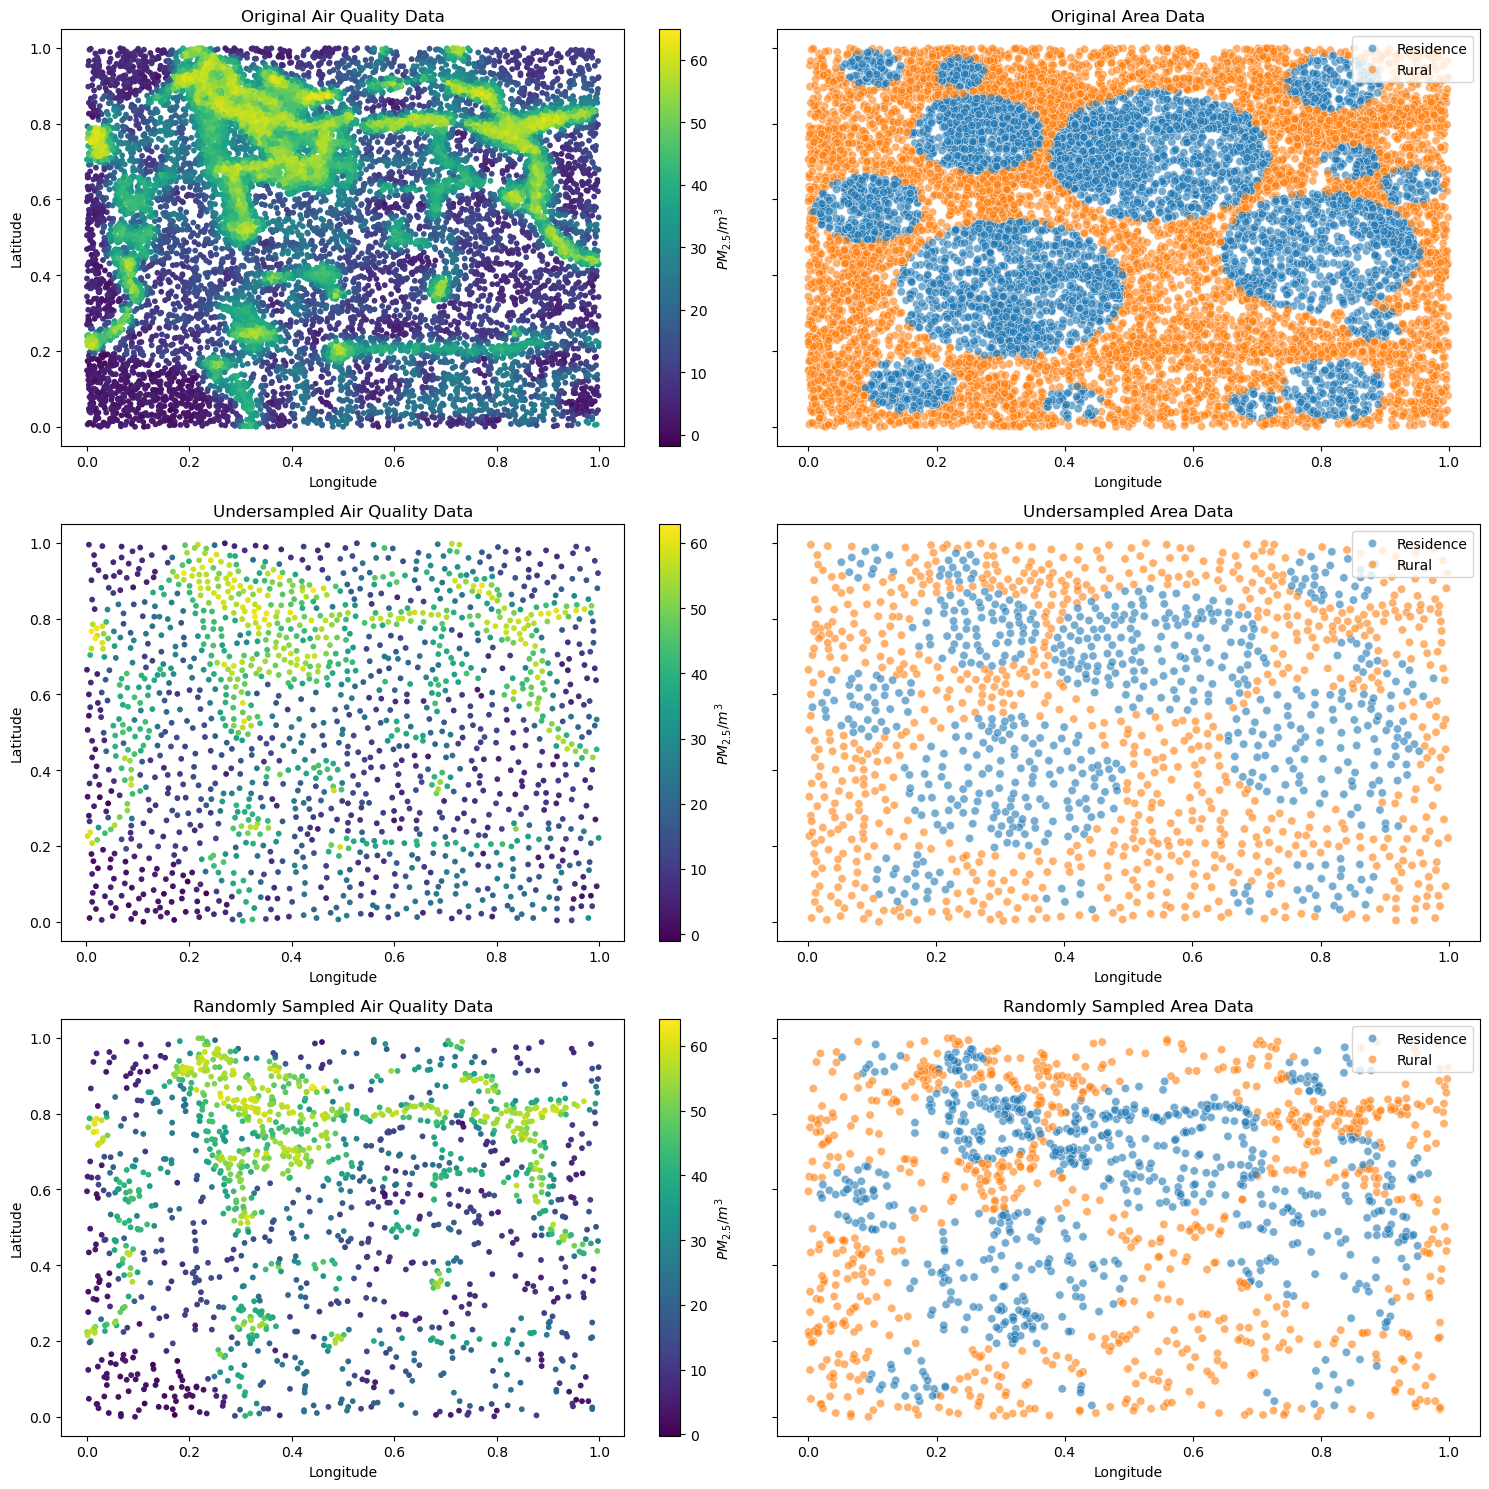

In [27]:
# Assuming `X` and `Y` are already defined and `kmeans_undersample_with_responses` is a function that returns undersampled data and responses
n_clusters = X.shape[0] // 10
undersampled_data, undersampled_areas, undersampled_responses = kmeans_undersample_with_responses(X[:, :2], X[:, 2], Y, n_clusters=n_clusters)

fig, ax = plt.subplots(3, 2, figsize=(15, 15), sharey=True)

# Plot the original data in the first row
scatter1 = ax[0, 0].scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis', s=10)
fig.colorbar(scatter1, ax=ax[0, 0], label='$PM_{2.5} / m^3$')
ax[0, 0].set_title('Original Air Quality Data')
ax[0, 0].set_xlabel('Longitude')
ax[0, 0].set_ylabel('Latitude')

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=np.where(X[:, 2] == 0, "Rural", "Residence"), ax=ax[0, 1], alpha=0.6)
ax[0, 1].set_title('Original Area Data')
ax[0, 1].set_xlabel('Longitude')

# Plot the undersampled data in the second row
scatter2 = ax[1, 0].scatter(undersampled_data[:, 0], undersampled_data[:, 1], c=undersampled_responses, cmap='viridis', s=10)
fig.colorbar(scatter2, ax=ax[1, 0], label='$PM_{2.5} / m^3$')
ax[1, 0].set_title('Undersampled Air Quality Data')
ax[1, 0].set_xlabel('Longitude')
ax[1, 0].set_ylabel('Latitude')

sns.scatterplot(x=undersampled_data[:, 0], y=undersampled_data[:, 1], hue=np.where(undersampled_areas == 0, "Rural", "Residence"), ax=ax[1, 1], alpha=0.6)
ax[1, 1].set_title('Undersampled Area Data')
ax[1, 1].set_xlabel('Longitude')

# Randomly sample n_cluster points from the original data
np.random.seed(0)
random_indices = np.random.choice(X.shape[0], n_clusters, replace=False)
random_data = X[random_indices, :2]
random_areas = X[random_indices, 2]
random_responses = Y[random_indices]

# Plot the randomly sampled data in the third row
scatter3 = ax[2, 0].scatter(random_data[:, 0], random_data[:, 1], c=random_responses, cmap='viridis', s=10)
fig.colorbar(scatter3, ax=ax[2, 0], label='$PM_{2.5} / m^3$')
ax[2, 0].set_title('Randomly Sampled Air Quality Data')
ax[2, 0].set_xlabel('Longitude')
ax[2, 0].set_ylabel('Latitude')

sns.scatterplot(x=random_data[:, 0], y=random_data[:, 1], hue=np.where(random_areas == 0, "Rural", "Residence"), ax=ax[2, 1], alpha=0.6)
ax[2, 1].set_title('Randomly Sampled Area Data')
ax[2, 1].set_xlabel('Longitude')

plt.tight_layout()
plt.show()



In [31]:
# compute pearson correlation coefficient of latitude and longitude with PM_2.5
corr_lat, lat_p = pearsonr(X[:, 0], Y)
corr_long, long_p = pearsonr(X[:, 1], Y)
corr__area, area_p = pearsonr(X[:, 2], Y)
# display result with numpy vector
print(f"Pearson correlation coefficient for Latitude: {corr_lat:.3f} (p-value: {lat_p:.3e})")
print(f"Pearson correlation coefficient for Longitude: {corr_long:.3f} (p-value: {long_p:.3e})")
print(f"Pearson correlation coefficient for Area: {corr__area:.3f} (p-value: {area_p:.3e})")

Pearson correlation coefficient for Latitude: -0.019 (p-value: 2.201e-02)
Pearson correlation coefficient for Longitude: 0.463 (p-value: 0.000e+00)
Pearson correlation coefficient for Area: 0.109 (p-value: 4.277e-41)


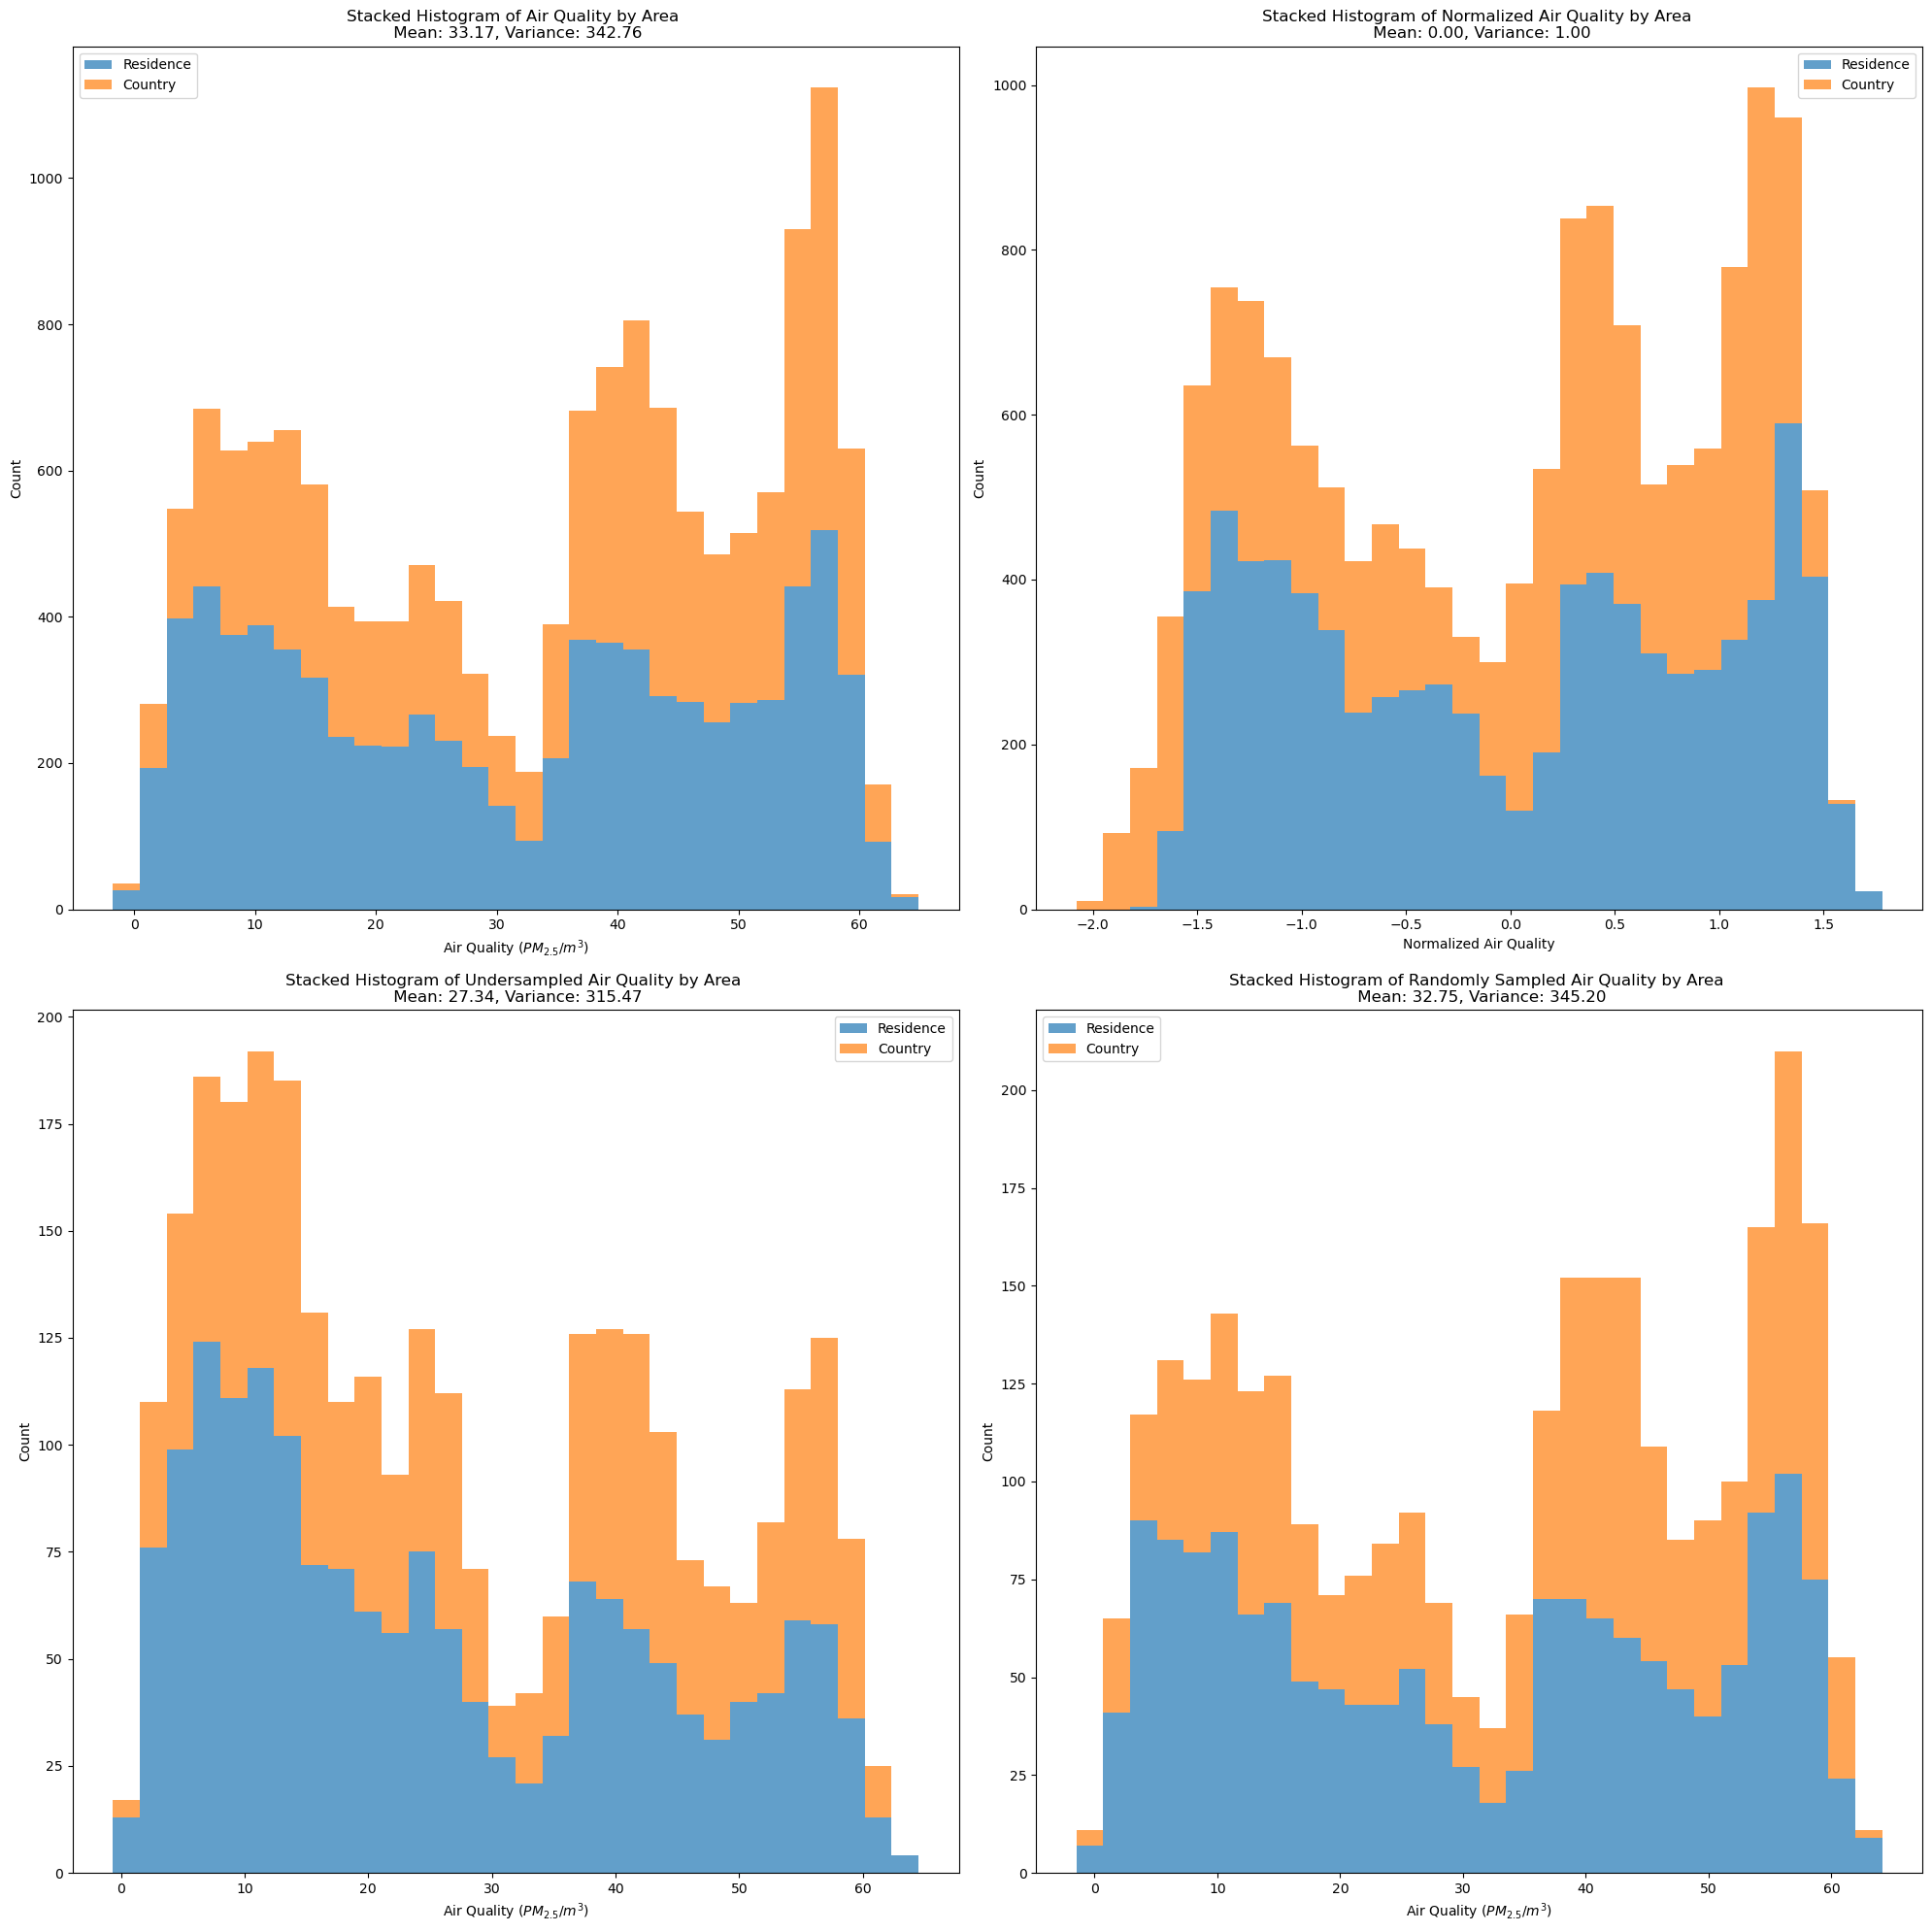

In [34]:
# # Assuming X and Y are already defined and kmeans_undersample_with_responses is a function that returns undersampled data and responses
# n_clusters = X.shape[0] // 5
# undersampled_data, undersampled_areas, undersampled_responses = kmeans_undersample_with_responses(X[:, :2], X[:, 2], Y, n_clusters=n_clusters)

# # Randomly sample n_cluster points from the original data
# np.random.seed(0)
# random_indices = np.random.choice(X.shape[0], n_clusters, replace=False)
# random_data = X[random_indices, :2]
# random_areas = X[random_indices, 2]
# random_responses = Y[random_indices]

# Create a figure with two rows and two columns of subplots
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

# Plot the original stacked histogram in the first subplot
ax[0, 0].hist([Y[X[:, 2] == 0], Y[X[:, 2] == 1]], bins=30, stacked=True, label=['Residence', 'Country'], alpha=0.7)
ax[0, 0].set_xlabel('Air Quality ($PM_{2.5} / m^3$)')
ax[0, 0].set_ylabel('Count')
corr_coef, corr_p = pearsonr(X[:, 2], Y)
mean_Y = np.mean(Y)
var_Y = np.var(Y)
ax[0, 0].set_title('Stacked Histogram of Air Quality by Area \n Mean: {:.2f}, Variance: {:.2f}'.format(mean_Y, var_Y))
ax[0, 0].legend()

# Calculate normalized data
mean_residence, mean_country = np.mean(Y[X[:, 2] == 0]), np.mean(Y[X[:, 2] == 1])
std_residence, std_country = np.std(Y[X[:, 2] == 0]), np.std(Y[X[:, 2] == 1])
X0_norm = (Y[X[:, 2] == 0] - mean_residence) / std_residence
X1_norm = (Y[X[:, 2] == 1] - mean_country) / std_country

# Plot the normalized stacked histogram in the second subplot
ax[0, 1].hist([X0_norm, X1_norm], bins=30, stacked=True, label=['Residence', 'Country'], alpha=0.7)
ax[0, 1].set_xlabel('Normalized Air Quality')
ax[0, 1].set_ylabel('Count')
mean_norm = np.mean(np.concatenate([X0_norm, X1_norm]))
var_norm = np.var(np.concatenate([X0_norm, X1_norm]))
ax[0, 1].set_title('Stacked Histogram of Normalized Air Quality by Area \n Mean: {:.2f}, Variance: {:.2f}'.format(mean_norm, var_norm))
ax[0, 1].legend()

# Plot the undersampled stacked histogram in the third subplot
ax[1, 0].hist([undersampled_responses[undersampled_areas == 0], undersampled_responses[undersampled_areas == 1]], bins=30, stacked=True, label=['Residence', 'Country'], alpha=0.7)
ax[1, 0].set_xlabel('Air Quality ($PM_{2.5} / m^3$)')
ax[1, 0].set_ylabel('Count')
mean_undersampled = np.mean(undersampled_responses)
var_undersampled = np.var(undersampled_responses)
ax[1, 0].set_title('Stacked Histogram of Undersampled Air Quality by Area \n Mean: {:.2f}, Variance: {:.2f}'.format(mean_undersampled, var_undersampled))
ax[1, 0].legend()

# Plot the randomly sampled stacked histogram in the fourth subplot
ax[1, 1].hist([random_responses[random_areas == 0], random_responses[random_areas == 1]], bins=30, stacked=True, label=['Residence', 'Country'], alpha=0.7)
ax[1, 1].set_xlabel('Air Quality ($PM_{2.5} / m^3$)')
ax[1, 1].set_ylabel('Count')
mean_random = np.mean(random_responses)
var_random = np.var(random_responses)
ax[1, 1].set_title('Stacked Histogram of Randomly Sampled Air Quality by Area \n Mean: {:.2f}, Variance: {:.2f}'.format(mean_random, var_random))
ax[1, 1].legend()

# Show the combined plot
plt.tight_layout()
plt.show()